# POVERTY SOMETHING

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import Petra

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

First we show what we do with the first set of data, then we do the same for all the other datasets, the only difference is the age-range considered. We do this to enable us to later merge the data with the different age-range specified

In [211]:
filename = 'relative_poverty.xlsx'
rp_tot = pd.read_excel(filename, sheet_name= 'Age-total')
rp_tot

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [212]:
# Rename columns by specifying a function
# Lambda function to modify the column names
# rp_tot.columns = rp_tot.columns.map(lambda x: x + '_rp_tot' if x.isdigit() else x)
# rp_tot
rp_tot.columns = rp_tot.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_rp_tot' if x.isdigit() else x)
rp_tot

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [213]:
#Here we import all the datasets on relative poverty, but considering the data for different age ranges
rp_17 = pd.read_excel(filename, sheet_name= '0-17')
rp_29 = pd.read_excel(filename, sheet_name= '18-29')
rp_39 = pd.read_excel(filename, sheet_name= '30-39')
rp_49 = pd.read_excel(filename, sheet_name= '40-49')
rp_59 = pd.read_excel(filename, sheet_name= '50-59')
rp_69 = pd.read_excel(filename, sheet_name= '60-69')
rp_79 = pd.read_excel(filename, sheet_name= '70-79')
rp_80 = pd.read_excel(filename, sheet_name= '80-onwards')

In [214]:
def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
rp_17 = rename_columns(rp_17, '_rp_17')
rp_29 = rename_columns(rp_29, '_rp_29')
rp_39 = rename_columns(rp_39, '_rp_39')
rp_49 = rename_columns(rp_49, '_rp_49')
rp_59 = rename_columns(rp_59, '_rp_59')
rp_69 = rename_columns(rp_69, '_rp_69')
rp_79 = rename_columns(rp_79, '_rp_79')
rp_80 = rename_columns(rp_80, '_rp_80')

rp_17

,location,2015_rp_17,2016_rp_17,2017_rp_17,2018_rp_17,2019_rp_17,2020_rp_17,2021_rp_17,2022_rp_17
0,All Denmark,3.8,4.6,5.6,5.4,5.3,5.0,4.7,4.2
1,Capital municipalities,3.9,4.3,5.2,5.0,5.0,4.8,4.5,4.0
2,Metropolitan municipalities,4.1,4.8,6.3,6.1,6.3,5.8,5.7,5.1
3,Provincial municipalities,3.5,4.3,5.3,5.1,4.9,4.7,4.5,3.9
4,Commuter municipalities,3.0,3.9,4.9,4.6,4.6,4.2,4.0,3.6
...,...,...,...,...,...,...,...,...,...
99,Morsø,5.7,7.5,8.1,6.5,5.9,5.1,6.5,4.7
100,Rebild,2.1,2.2,3.2,3.4,3.2,3.3,2.4,2.3
101,Thisted,4.5,5.0,6.0,6.2,5.6,5.6,4.9,3.9
102,Vesthimmerlands,5.6,6.0,6.2,6.0,5.9,5.5,4.9,4.3


In [215]:
#Here we compute the same operations but using the Net Wealth dataset instead:

filename2 = 'net_wealth.xlsx'
nw_18_over = pd.read_excel(filename2, sheet_name= '18-over')

#Renaming columns
nw_18_over.columns = nw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nw_29 = rename_columns(nw_29, '_nw_29')
nw_39 = rename_columns(nw_39, '_nw_39')
nw_49 = rename_columns(nw_49, '_nw_49')
nw_59 = rename_columns(nw_59, '_nw_59')
nw_69 = rename_columns(nw_69, '_nw_69')
nw_79 = rename_columns(nw_79, '_nw_79')
nw_80 = rename_columns(nw_80, '_nw_80')

In [216]:
#Here we compute the same operations but using the Negative Net Dataset instead:
filename3 = 'neg_net_wealth.xlsx'
nnw_18_over = pd.read_excel(filename3, sheet_name= '18-over')

#Renaming columns
nnw_18_over.columns = nnw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nnw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nnw_29 = pd.read_excel(filename3, sheet_name= '18-29')
nnw_39 = pd.read_excel(filename3, sheet_name= '30-39')
nnw_49 = pd.read_excel(filename3, sheet_name= '40-49')
nnw_59 = pd.read_excel(filename3, sheet_name= '50-59')
nnw_69 = pd.read_excel(filename3, sheet_name= '60-69')
nnw_79 = pd.read_excel(filename3, sheet_name= '70-79')
nnw_80 = pd.read_excel(filename3, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nnw_29 = rename_columns(nnw_29, '_nnw_29')
nnw_39 = rename_columns(nnw_39, '_nnw_39')
nnw_49 = rename_columns(nnw_49, '_nnw_49')
nnw_59 = rename_columns(nnw_59, '_nnw_59')
nnw_69 = rename_columns(nnw_69, '_nnw_69')
nnw_79 = rename_columns(nnw_79, '_nnw_79')
nnw_80 = rename_columns(nnw_80, '_nnw_80')

# Merge Datasets

Here we combine our datasets on relative poverty, in order to have just one with all the different age ranges specified

In [217]:
datasets = [rp_17, rp_29, rp_39, rp_49, rp_59, rp_69, rp_79, rp_80]

# Initialize the merged dataset with the first dataset
merged_rp = rp_tot

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_rp = merged_rp.merge(dataset, on='location')

# Print the merged dataset
merged_rp

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot,2015_rp_17,...,2021_rp_79,2022_rp_79,2015_rp_80,2016_rp_80,2017_rp_80,2018_rp_80,2019_rp_80,2020_rp_80,2021_rp_80,2022_rp_80
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7,3.8,...,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.8,1.0,0.8
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0,3.9,...,1.1,0.9,1.0,0.9,1.0,0.9,0.9,1.0,1.3,1.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6,4.1,...,0.8,0.6,0.9,0.8,0.9,0.7,0.9,0.8,1.2,0.9
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5,3.5,...,0.7,0.6,0.6,0.6,0.7,0.6,0.7,0.7,0.9,0.7
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9,3.0,...,0.6,0.5,0.7,0.6,0.6,0.6,0.6,0.7,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1,5.7,...,1.0,0.4,0.4,0.3,0.4,0.4,0.8,0.2,0.8,0.4
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9,2.1,...,0.7,0.4,0.2,0.4,0.4,0.3,0.2,0.8,0.7,0.6
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2,4.5,...,0.7,0.7,0.4,0.4,0.5,0.5,0.5,0.7,0.9,0.6
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3,5.6,...,0.8,0.5,0.3,0.4,0.2,0.5,0.6,1.0,0.7,0.6


In [218]:
#Mearging datasets on net wealth:
datasets = [nw_29, nw_39, nw_49, nw_59, nw_69, nw_79, nw_80]

# Initialize the merged dataset with the first dataset
merged_nw = nw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nw = merged_nw.merge(dataset, on='location')

merged_nw

,location,2014_nw_18_over,2015_nw_18_over,2016_nw_18_over,2017_nw_18_over,2018_nw_18_over,2019_nw_18_over,2020_nw_18_over,2021_nw_18_over,2022_nw_18_over,...,2022_nw_79,2014_nw_80,2015_nw_80,2016_nw_80,2017_nw_80,2018_nw_80,2019_nw_80,2020_nw_80,2021_nw_80,2022_nw_80
0,All Denmark,424030,457967,493166,531665,547467,611289,675175,752900,701429,...,1520929,648413,672649,697826,736633,766356,808149,845385,920742,940050
1,Capital municipalities,445701,490596,521797,553036,563836,614787,680900,739423,674498,...,2099157,814068,863468,911708,971776,1013982,1087798,1155454,1273427,1315086
2,Metropolitan municipalities,263825,286329,304603,322136,325931,357030,398168,442355,409333,...,1663841,639565,673838,709351,761071,811235,860951,896564,973515,998729
3,Provincial municipalities,426021,460731,499840,544270,565146,637419,703306,790697,738875,...,1471643,636139,660681,684158,720911,746390,792604,831236,899056,919090
4,Commuter municipalities,502740,538153,586441,641036,667947,752423,827744,936478,880420,...,1520070,660809,676931,705964,750415,779973,819805,857582,938813,950745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,435593,481452,508168,551551,552895,607091,665579,724721,703391,...,1140245,526975,583032,574841,608875,610089,633435,659651,718213,755686
100,Rebild,577328,588561,655969,677211,720565,776218,835553,940358,908467,...,1489972,776646,743555,780614,801784,870791,886305,877149,922561,921536
101,Thisted,450150,483470,503645,556315,556535,616586,690912,772782,726938,...,1223738,586715,616287,634118,668981,674757,718238,749098,802818,797500
102,Vesthimmerlands,440199,443381,491206,531309,534216,615582,672841,749516,723450,...,1241721,592607,581605,624418,639834,627717,673381,673327,723523,733795


In [219]:
#Merging datasets on negative net wealth
datasets = [nnw_29, nnw_39, nnw_49, nnw_59, nnw_69, nnw_79, nnw_80]

# Initialize the merged dataset with the first dataset
merged_nnw = nnw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nnw = merged_nnw.merge(dataset, on='location')


In [220]:
# For explanatory reasons:
# We now have three datasets:

# merged_rp: which contains all the data on relative-poverty divided also by age ranges
# merged_nw: which contains all the data on net wealth divided also by age ranges
# merged_nnw: which contains all the data on negative net wealth divided also by age ranges

SLICING: Cutting off extra municipalities

In [221]:
#Here we sliced the dataset for net-wealth in order to keep just the first rows, excluding all the municipalities
merged_nw_final = merged_nw.iloc[:7]
merged_nw_final

,location,2014_nw_18_over,2015_nw_18_over,2016_nw_18_over,2017_nw_18_over,2018_nw_18_over,2019_nw_18_over,2020_nw_18_over,2021_nw_18_over,2022_nw_18_over,...,2022_nw_79,2014_nw_80,2015_nw_80,2016_nw_80,2017_nw_80,2018_nw_80,2019_nw_80,2020_nw_80,2021_nw_80,2022_nw_80
0,All Denmark,424030,457967,493166,531665,547467,611289,675175,752900,701429,...,1520929,648413,672649,697826,736633,766356,808149,845385,920742,940050
1,Capital municipalities,445701,490596,521797,553036,563836,614787,680900,739423,674498,...,2099157,814068,863468,911708,971776,1013982,1087798,1155454,1273427,1315086
2,Metropolitan municipalities,263825,286329,304603,322136,325931,357030,398168,442355,409333,...,1663841,639565,673838,709351,761071,811235,860951,896564,973515,998729
3,Provincial municipalities,426021,460731,499840,544270,565146,637419,703306,790697,738875,...,1471643,636139,660681,684158,720911,746390,792604,831236,899056,919090
4,Commuter municipalities,502740,538153,586441,641036,667947,752423,827744,936478,880420,...,1520070,660809,676931,705964,750415,779973,819805,857582,938813,950745
5,Rural municipalities,434080,459278,493614,533313,548307,619998,685015,769117,724881,...,1214014,562871,580077,593826,624559,641458,669179,695483,755697,767749
6,Copenhagen,275998,301918,318158,333743,336942,364425,410386,431725,400015,...,1669989,532882,562387,594097,648806,688361,739501,800485,895335,940126


In [222]:
#Here we just flip the dataset, to make it easier to read
nw_long = pd.melt(merged_nw_final, id_vars=['location'], var_name='year', value_name='net_wealth')
nw_long

,location,year,net_wealth
0,All Denmark,2014_nw_18_over,424030
1,Capital municipalities,2014_nw_18_over,445701
2,Metropolitan municipalities,2014_nw_18_over,263825
3,Provincial municipalities,2014_nw_18_over,426021
4,Commuter municipalities,2014_nw_18_over,502740
...,...,...,...
499,Metropolitan municipalities,2022_nw_80,998729
500,Provincial municipalities,2022_nw_80,919090
501,Commuter municipalities,2022_nw_80,950745
502,Rural municipalities,2022_nw_80,767749


In [223]:
#We do the same also for the two other datasets, the one on relative poverty and the one on negative net wealth
merged_nnw_final = merged_nnw.iloc[:7]
nnw_long = pd.melt(merged_nnw_final, id_vars=['location'], var_name='year', value_name='negative_net_wealth')
merged_nnw_final #this is the same initial shape
nnw_long #this is flipped

,location,year,negative_net_wealth
0,All Denmark,2014_nnw_18_over,12.0
1,Capital municipalities,2014_nnw_18_over,10.5
2,Metropolitan municipalities,2014_nnw_18_over,13.7
3,Provincial municipalities,2014_nnw_18_over,12.1
4,Commuter municipalities,2014_nnw_18_over,11.9
...,...,...,...
499,Metropolitan municipalities,2022_nnw_80,2.7
500,Provincial municipalities,2022_nnw_80,2.7
501,Commuter municipalities,2022_nnw_80,3.2
502,Rural municipalities,2022_nnw_80,2.9


In [224]:
merged_rp_final = merged_rp.iloc[:7]
rp_long = pd.melt(merged_rp_final, id_vars=['location'], var_name='year', value_name='relative_poverty')
merged_rp_final #this is the same initial shape
rp_long #this is flipped

,location,year,relative_poverty
0,All Denmark,2015_rp_tot,3.6
1,Capital municipalities,2015_rp_tot,4.0
2,Metropolitan municipalities,2015_rp_tot,4.0
3,Provincial municipalities,2015_rp_tot,3.4
4,Commuter municipalities,2015_rp_tot,2.7
...,...,...,...
499,Metropolitan municipalities,2022_rp_80,0.9
500,Provincial municipalities,2022_rp_80,0.7
501,Commuter municipalities,2022_rp_80,0.7
502,Rural municipalities,2022_rp_80,0.7


# Analysis

In [226]:
rp_tot_long = pd.melt(rp_tot, id_vars=['location'], var_name='year', value_name='relative_poverty')
rp_tot_long


,location,year,relative_poverty
0,All Denmark,2015_rp_tot,3.6
1,Capital municipalities,2015_rp_tot,4.0
2,Metropolitan municipalities,2015_rp_tot,4.0
3,Provincial municipalities,2015_rp_tot,3.4
4,Commuter municipalities,2015_rp_tot,2.7
...,...,...,...
827,Morsø,2022_rp_tot,3.1
828,Rebild,2022_rp_tot,1.9
829,Thisted,2022_rp_tot,3.2
830,Vesthimmerlands,2022_rp_tot,3.3


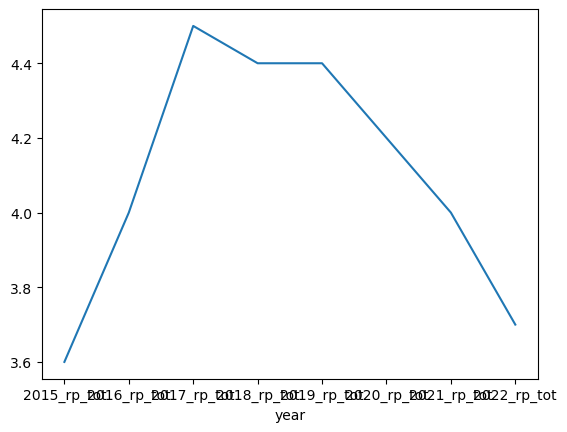

In [227]:
# Filter the DataFrame for 'All Denmark'
rp_all_dk = rp_tot_long[rp_tot_long['location'] == 'All Denmark']

# Plot the relative poverty data for 'All Denmark'
rp_all_dk.plot(x='year', y='relative_poverty', legend=False);

**Comparison between Relative Poverty and Negative Net Wealth to look at:** \
    1. Differences across municipalities \
    2. Differences across age groups \
To do this we use the rp_long dataset


In [234]:
# Perform the split operation and assign it to a temporary variable
split_columns = rp_long['year'].str.split('_', expand=True)

# Combine the last two parts for the 'age_group'
split_columns['age_group'] = split_columns[1] + "_" + split_columns[2]

# Now, assign the first part to 'year' and the combined part to 'age_group'
rp_long['year'] = split_columns[0].astype(int)  # Convert 'year' to an integer
rp_long['age_group'] = split_columns['age_group']

# Check the DataFrame to ensure the changes are as expected
print(rp_long.head())

                      location  year  relative_poverty age_group
0                  All Denmark  2015               3.6    rp_tot
1       Capital municipalities  2015               4.0    rp_tot
2  Metropolitan municipalities  2015               4.0    rp_tot
3    Provincial municipalities  2015               3.4    rp_tot
4      Commuter municipalities  2015               2.7    rp_tot


In [ ]:
import matplotlib.pyplot as plt

# Filter data for "All Denmark" and the 'rp_80' age group
rp_80_all_denmark = rp_tot_long[(rp_tot_long['location'] == 'All Denmark') & (rp_tot_long['age_group'] == 'rp_80')]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(rp_80_all_denmark['year'], rp_80_all_denmark['relative_poverty'], marker='o', linestyle='-', color='blue')
plt.title('Relative Poverty Trend in All Denmark for Age Group 80+')
plt.xlabel('Year')
plt.ylabel('Relative Poverty (%)')
plt.xticks(rp_80_all_denmark['year'].unique())  # Ensure all years are shown
plt.grid(True)
plt.show()

# Conclusion